##Tarea 6.6

Use el método de bisección para encontrar un cero de la función

$$
f(x) = 1 - \cos(x) -\frac{\sin(x)}{x}
$$

entre $-6.5$ y $-6.0$. Grafique el error relativo requerido al calcular el cero en función del número de iteraciones que necesita el método para converger. Compare con la cota teórica.

In [25]:
import numpy as np

In [27]:
def func(x):
    return 1-np.cos(x)-np.sin(x)/x

In [26]:
import matplotlib.pyplot as plt

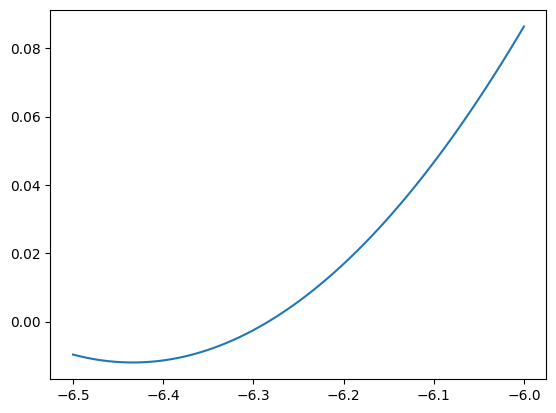

In [28]:
x = np.linspace(-6.5, -6.0, 100)
plt.plot(x, func(x))

In [29]:
func(-6.5)

-0.00968300851076434

In [30]:
func(-6.0)

0.08639896304945502

In [36]:
def biseccion(func, a, b, epsilon, N=1000000):

    for i in range(N):
        p = a + (b - a)/2
        print(p)
        if abs(func(p)) < epsilon:
            print("Cero en", p, "encontrado después de", i, "iteraciones.")
            return p
        elif func(p)*func(a) > 0:
            a = p
        else:
            b = p
    print("No se encontró el cero después de", N, "iteraciones.")

In [32]:
biseccion(func, -6.5, -6.0, 0.0001)

-6.25
-6.375
-6.3125
-6.28125
-6.296875
-6.2890625
-6.28515625
-6.283203125
Cero en -6.283203125 encontrado después de 7 iteraciones.


-6.283203125

#para confirmar:

p = -6.25, error = 0.04, iteraciones = 0
p = -6.375, error = 0.0196078431372549, iteraciones = 1
p = -6.3125, error = 0.009900990099009901, iteraciones = 2
p = -6.28125, error = 0.004975124378109453, iteraciones = 3
p = -6.296875, error = 0.0024813895781637717, iteraciones = 4
p = -6.2890625, error = 0.0012422360248447205, iteraciones = 5
p = -6.28515625, error = 0.0006215040397762585, iteraciones = 6
p = -6.283203125, error = 0.00031084861672365556, iteraciones = 7
p = -6.2822265625, error = 0.000155448468832582, iteraciones = 8
p = -6.28271484375, error = 7.771819382917541e-05, iteraciones = 9
la cota teórica es: 0.0009765625


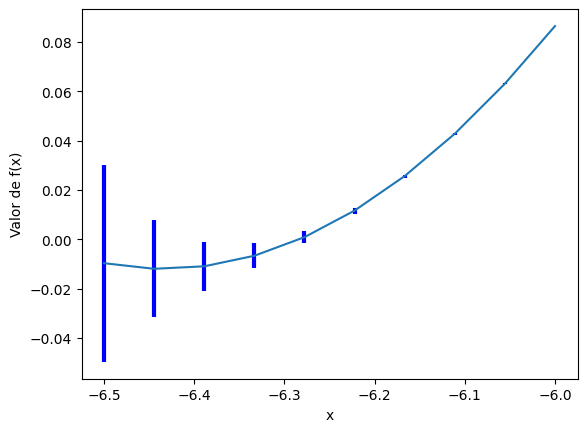

In [134]:
def biseccion(f, a, b, epsilon, N=1000000):

  error_relativo = []  #arreglo vacío al cual se le irá agregando valores de error.
  pp = a

  for i in range(N):
      p = a + (b - a)/2
      error_relativo.append(abs(p - pp)/abs(p))
      print(f'p = {p}, error = {error_relativo[-1]}, iteraciones = {i}')
      if error_relativo[-1] < epsilon:
          return p, error_relativo, i
      elif f(p)*f(a) > 0:
          a = p
      else:
          b = p
      pp = p
  print("No se encontró el cero después de", N, "iteraciones.")


p, error_relativo, iteraciones = biseccion(func, -6.5, -6.0, 0.0001)
print('la cota teórica es:',((-6.0) -(-6.5))/(2**iteraciones)) #imprime el valor de la cota teórica
x = np.linspace(-6.5, -6, iteraciones +1) #da eje x en el gráfico y sus valores separados por iteraciones
plt.errorbar(x, func(x), yerr = error_relativo, ecolor = 'blue', elinewidth = 3, capsize = 0)
#error relativo corresponde al errorbar
plt.xlabel('x')
plt.ylabel('Valor de f(x)')
plt.show()

comparando la cota teorica con los valores de error para cada iteración, vemos que mientras más grande la iteración, el valor de error irá disminuyendo, ya que esta convergerá cada vez más al valor de 0 (al ser más precisos al tener más datos). la diferencia de la cota con el error son más notorias cuando el numero de iteraciones está por debajo de la i = 7